In [8]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [9]:
cohort_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [10]:
dataset=pd.read_pickle(cohort_input_address)

In [11]:
dataset

,InChIKey,cactvs_fingerprint,metlin_adduct_or_nist,cid,inchikey,dot_product,exp_energy_parsed,fingerprint_array
0,WDUMYOXRHLWOIR-UHFFFAOYSA-N,1000000001110011000000000000000000000000000100...,nist,28058793.0,WDUMYOXRHLWOIR-UHFFFAOYSA-N,0.987620,39.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
3,IVSBFRVZTXHJLR-UHFFFAOYSA-N,1100000001110011001100000000000001000000000000...,nist,315800.0,IVSBFRVZTXHJLR-UHFFFAOYSA-N,0.855915,37.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
4,BJVLFJADOVATRU-UHFFFAOYSA-N,1100000001110000001100000000000000000000000000...,nist,747832.0,BJVLFJADOVATRU-UHFFFAOYSA-N,0.889937,38.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
5,YAUZWMLHLWHCLG-UHFFFAOYSA-N,1100000001110000001110000000000000000000000100...,nist,221498.0,YAUZWMLHLWHCLG-UHFFFAOYSA-N,0.996398,39.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, ..."
9,ZKLSFAKJJJDQSA-UHFFFAOYSA-N,1110000001110011001000000000000000000000000000...,nist,3328378.0,ZKLSFAKJJJDQSA-UHFFFAOYSA-N,0.280932,40.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
...,...,...,...,...,...,...,...,...
15951,AZVXNMOQCHVDQG-UHFFFAOYSA-N,0000000001100011000000000000000001000100000000...,nist,333028.0,AZVXNMOQCHVDQG-UHFFFAOYSA-N,1.000000,36.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
15952,RMCQCVYGHWTDSP-UHFFFAOYSA-N,1100000001110010001000000000000000000000000100...,nist,12137098.0,RMCQCVYGHWTDSP-UHFFFAOYSA-N,1.000000,42.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."
15955,HUKQFKKFOGVZGH-UHFFFAOYSA-N,1000000001100010001000000000000000000110000100...,nist,11289725.0,HUKQFKKFOGVZGH-UHFFFAOYSA-N,0.997734,37.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
15957,MNDACYDFCGIUAF-UHFFFAOYSA-N,1000000001110011100000000000000001000000000000...,nist,295675.0,MNDACYDFCGIUAF-UHFFFAOYSA-N,0.586894,42.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, ..."


In [12]:
dataset=shuffle(dataset,random_state=1337)
dataset.reset_index(inplace=True)

In [13]:
X=np.array(dataset.fingerprint_array.to_list())

In [14]:
#test for other script
X[:,1]

array([1, 1, 0, ..., 1, 1, 1])

In [15]:
X

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [16]:
y=np.array(dataset.dot_product.to_list())

In [17]:
np.floor(0.8*len(X))

6638.0

In [18]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]


In [19]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6638
6638
1660
1660


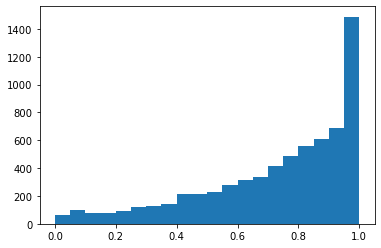

In [20]:
plt.hist(y_train,bins=20)
plt.show()

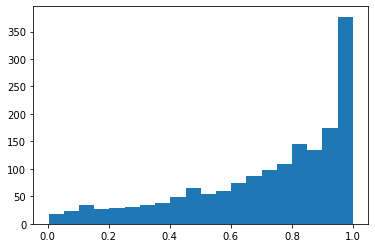

In [21]:
plt.hist(y_test,bins=20)
plt.show()

In [22]:

my_RandomForestRegressor_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_RandomForestRegressor',RandomForestRegressor())
    ]
)
my_RandomForestRegressor_parameters=[
    {
        'my_RandomForestRegressor__n_estimators':[10,20,40,100,200],
        'my_RandomForestRegressor__n_jobs':[4],
        'my_RandomForestRegressor__random_state':[1337]#,
        #'my_RandomForestRegressor__max_depth':[5]
        
    }
]

In [23]:
my_RandomForestRegressor_Gridsearch=GridSearchCV(
    my_RandomForestRegressor_Pipeline,
    my_RandomForestRegressor_parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

my_RandomForestRegressor_Gridsearch.fit(X_train,y_train)

my_RandomForestRegressor_Gridsearch_results=my_RandomForestRegressor_Gridsearch.cv_results_
for mean_score, params in zip(my_RandomForestRegressor_Gridsearch_results["mean_test_score"],my_RandomForestRegressor_Gridsearch_results["params"]):
    print(np.sqrt(-mean_score), params)
    
winner_RandomForestRegressor=my_RandomForestRegressor_Gridsearch.best_estimator_


0.21584832707430543 {'my_RandomForestRegressor__n_estimators': 10, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.21191127369105323 {'my_RandomForestRegressor__n_estimators': 20, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.2084101371391132 {'my_RandomForestRegressor__n_estimators': 40, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.2065882665103466 {'my_RandomForestRegressor__n_estimators': 100, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}
0.2058585592730721 {'my_RandomForestRegressor__n_estimators': 200, 'my_RandomForestRegressor__n_jobs': 4, 'my_RandomForestRegressor__random_state': 1337}


In [24]:
#define a function to visualize how good each "winning model" does
def plot_real_and_predict(temp_winning_model,temp_X_test,temp_y_test):
    '''
    Greetings
    '''
    temp_predictions=temp_winning_model.predict(temp_X_test)
    difference_array=np.subtract(np.array(temp_predictions),np.array(temp_y_test))
    #average_array=np.add(np.array(temp_predictions),np.array(temp_y_test))/2
    #percent_error_array=np.divide(100*difference_array,average_array)
    #plt.hist(percent_error_array,bins=100)
    plt.hist(difference_array,bins=100)
    plt.xlabel('dif')
    plt.ylabel('number of compounds')
    plt.show()

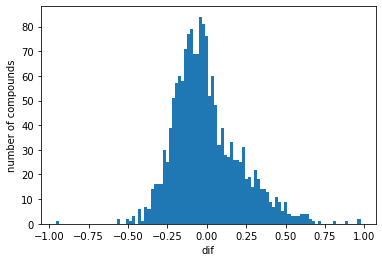

In [25]:
plot_real_and_predict(winner_RandomForestRegressor,X_test,y_test)

In [26]:
forest=winner_RandomForestRegressor['my_RandomForestRegressor']

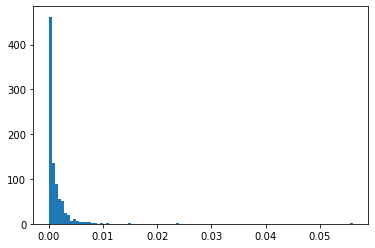

In [27]:
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [28]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

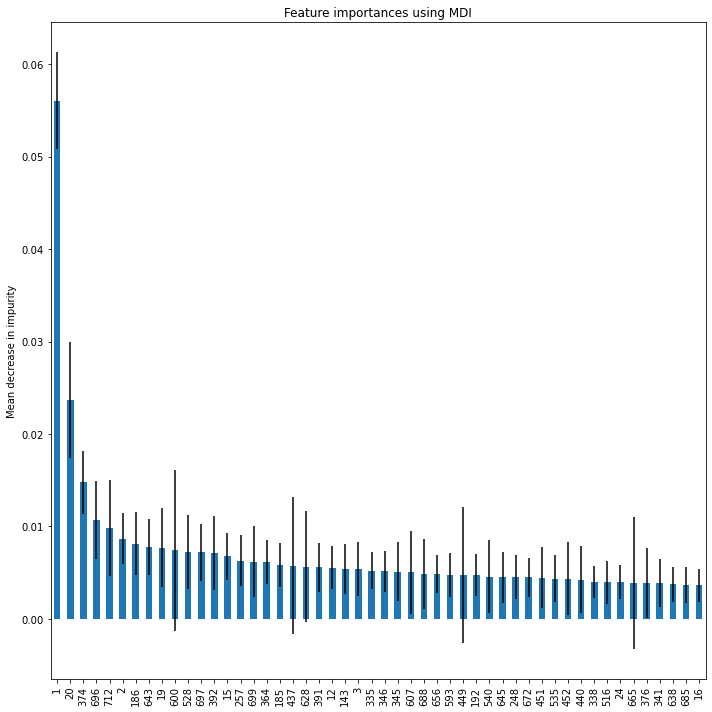

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [60]:
forest_importances.index


Int64Index([  1,  20, 374, 696, 712,   2, 186, 643,  19, 600, 528, 697, 392,
             15, 257, 699, 364, 185, 437, 628, 391,  12, 143,   3, 335, 346,
            345, 607, 688, 656, 593, 449, 192, 540, 645, 248, 672, 451, 535,
            452, 440, 338, 516,  24, 665, 376, 341, 638, 685,  16],
           dtype='int64')

(array([ 162.,  159.,  215.,  271.,  426.,  505.,  654.,  906., 1166.,
        2174.]),
 array([7.29218596e-05, 1.00065630e-01, 2.00058337e-01, 3.00051045e-01,
        4.00043753e-01, 5.00036461e-01, 6.00029169e-01, 7.00021877e-01,
        8.00014584e-01, 9.00007292e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

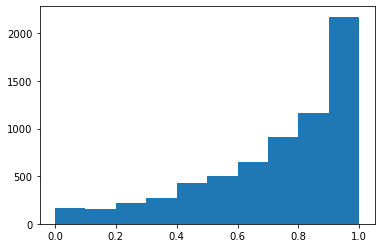

In [30]:
plt.hist(y_train)

In [31]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]

In [32]:
#one approach
#y_train=np.square(y_train)

In [33]:
my_max=max(y_train[y_train<1])

In [34]:
y_train[y_train==1]=my_max

In [35]:
y_train=np.log2((1-y_train))

(array([ 287.,   14.,   36.,   79.,  141.,  271.,  573., 1117., 2104.,
        2016.]),
 array([-1.49198832e+01, -1.34279054e+01, -1.19359276e+01, -1.04439498e+01,
        -8.95197200e+00, -7.45999420e+00, -5.96801640e+00, -4.47603860e+00,
        -2.98406081e+00, -1.49208301e+00, -1.05207841e-04]),
 <BarContainer object of 10 artists>)

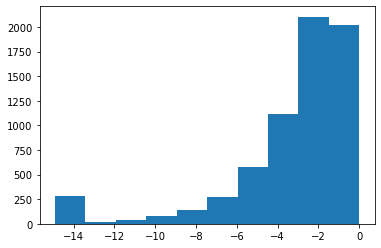

In [36]:
plt.hist(y_train)

In [37]:
my_Linear_Pipeline = Pipeline([
    ('my_StandardScaler',StandardScaler()),
    ('my_LinearRegression',LinearRegression())
])

my_Linear_Pipeline_Parameters = [
    {
        'my_LinearRegression__fit_intercept':[True,False]
    }
]


In [38]:
my_Linear_Gridsearch=GridSearchCV(
    my_Linear_Pipeline,
    my_Linear_Pipeline_Parameters,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)
my_Linear_Gridsearch.fit(X_train,y_train)
my_Linear_Gridsearch_results=my_Linear_Gridsearch.cv_results_
for mean_score, params in zip(my_Linear_Gridsearch_results["mean_test_score"],my_Linear_Gridsearch_results["params"]):
    print(np.sqrt(-mean_score), params)
winner_LinearRegression=my_Linear_Gridsearch.best_estimator_
#plot_real_and_predict(winner_LinearRegression,X_test,y_test)

700923279059.6205 {'my_LinearRegression__fit_intercept': True}
2275664658275.4297 {'my_LinearRegression__fit_intercept': False}


In [39]:
y_predict=winner_LinearRegression.predict(X_test)

In [41]:
#y_pred

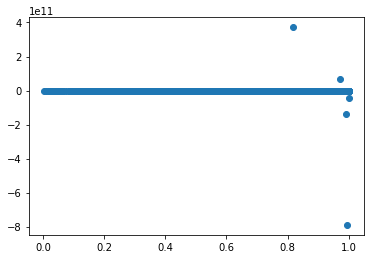

In [42]:

plt.scatter(y_test,y_predict)
plt.show()

In [43]:
y_test

array([0.7685575 , 0.10098461, 0.57853069, ..., 0.8232397 , 0.82250649,
       0.85896524])

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.656e+03, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-7.89963288e+11, -6.73760586e+11, -5.57557885e+11, -4.41355183e+11,
        -3.25152481e+11, -2.08949780e+11, -9.27470780e+10,  2.34556237e+10,
         1.39658325e+11,  2.55861027e+11,  3.72063729e+11]),
 <BarContainer object of 10 artists>)

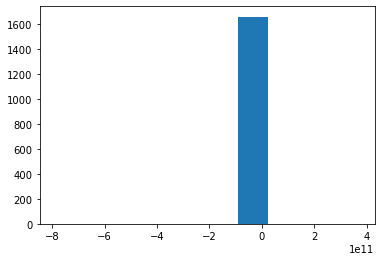

In [44]:
plt.hist(y_predict)

(array([ 41.,  62.,  58.,  72., 113., 114., 162., 207., 280., 551.]),
 array([0.00251901, 0.10226711, 0.20201521, 0.30176331, 0.40151141,
        0.50125951, 0.60100761, 0.7007557 , 0.8005038 , 0.9002519 ,
        1.        ]),
 <BarContainer object of 10 artists>)

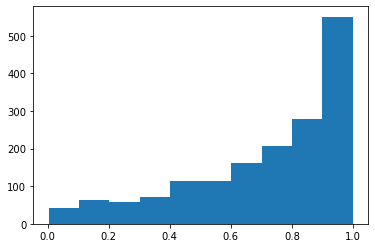

In [45]:
plt.hist(y_test)

In [46]:
max(y_predict)

372063728745.91156

In [47]:
list(y_predict).index(max(y_predict))

38

In [48]:
X_test[1558]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
winner_LinearRegression['my_LinearRegression'].coef_

array([ 2.80994035e-01,  4.70512200e-01, -5.44039394e-02, -1.63966991e-01,
        9.43039974e+12, -2.41849387e+12, -3.90826837e+12,  3.85356446e+11,
        1.99825998e+12, -8.98437500e-02,  5.37109375e-02,  8.49609375e-02,
       -7.32421875e-03, -1.73309326e-01,  5.27343750e-02, -2.75573730e-02,
        3.21655273e-02,  1.42364502e-02, -5.60913086e-02, -1.43432617e-03,
       -2.76535034e-01, -3.83758545e-01,  5.34553528e-02, -1.52631475e+11,
       -2.07214355e-01,  5.98144531e-03, -3.59500121e+10,  2.03427138e+11,
        1.70448263e+11, -3.36444085e+10,  1.15966797e-03, -9.82666016e-02,
        1.97267901e+10, -2.12890625e-01, -1.11541748e-02, -3.41491699e-02,
        2.54331440e+11,  7.94982910e-02, -1.45996094e-01,  7.38525391e-02,
        1.81386129e+11,  1.99032221e+11, -1.62393414e+11,  5.11654604e+11,
       -2.21801758e-01,  5.49784049e+10, -2.59453676e+11, -4.79583740e-02,
        2.21482834e+11, -7.49306074e+10,  8.80159420e+10,  9.68698680e+10,
       -1.13022995e+11, -

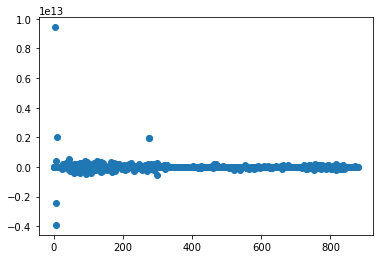

In [50]:
plt.scatter(
    range(len(winner_LinearRegression['my_LinearRegression'].coef_)),
    winner_LinearRegression['my_LinearRegression'].coef_
)

In [ ]:
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [52]:
lin_importances=winner_LinearRegression['my_LinearRegression'].coef_
lin_feature_names= [i for i in range(X.shape[1])]
lin_importances_series=pd.Series(lin_importances, index=lin_feature_names)

In [57]:
lin_importances_series.abs().sort_values(ascending=False)[0:20]

4      9.430400e+12
6      3.908268e+12
5      2.418494e+12
8      1.998260e+12
274    1.972251e+12
276    1.936017e+12
297    5.116546e+11
43     5.116546e+11
94     4.421120e+11
108    4.084463e+11
126    3.877218e+11
90     3.866859e+11
7      3.853564e+11
75     3.847795e+11
57     3.715874e+11
95     3.616586e+11
67     3.490208e+11
164    3.436643e+11
167    3.436643e+11
137    3.259683e+11
dtype: float64